### Introduction

In linear algebra, a **solution set** is the collection of all possible values for variables that satisfy a system of linear equations. It can be a single point, representing a unique solution; a line, plane, or higher-dimensional space, indicating infinitely many solutions; or empty, meaning no solutions exist. Solution sets help understand the relationships between equations and characterize the properties of linear systems. It's called a "set" because it contains all valid solutions for a linear system.


### Definitions

Let's begin with our augmented RREF matrix from the previous section:

$$
\displaystyle \left(\begin{array}{rrr|r}
1 & 0 & 0 & \frac{8}{9} \\
0 & 1 & 0 & \frac{7}{3} \\
0 & 0 & 1 & \frac{14}{9}
\end{array}\right)
$$

- **Coefficients**: the columns to the left of the vertical bar
- **Constants**: the column to the right of the vertical bar
- **Pivots**:  a pivot element is a nonzero element that is the first nonzero entry in its row when using the Gaussian elimination method to convert the matrix into row echelon form or reduced row echelon form

In the above example, we have a pivot in each **coefficient** column.

SageMath has a method `pivots()` to return the pivot locations for a matrix:

In [1]:
A = Matrix([[1, 0, 0, 8/9],
            [0, 1, 0, 7/3],
            [0, 0, 1, 14/9]])

A.pivots()

(0, 1, 2)

### Determining how many solutions

The following RREF's show the three types of solutions that are possible:

<div style="display: flex;">
<div style="flex: 1;">
$$
\left(\begin{array}{rr|r}
1 & 0 & \frac{-2}{7} \\
0 & 1 & \frac{4}{7} \\
\end{array}\right)
$$
Unique Solution
</div>
<div style="margin-left: 20px; flex: 1;">
$$
\left(\begin{array}{rr|r}
1 & 0 & 2 \\
0 & 1 & 3 \\
0 & 0 & 0 \\
\end{array}\right)
$$
Infinite Solutions
</div>
<div style="margin-left: 20px; flex: 1;">
$$
\left(\begin{array}{rr|r}
1 & 0 & 2 \\
0 & 1 & 3 \\
0 & 0 & 1 \\
\end{array}\right)
$$
No solutions
</div>
</div>


- **Unique Solution**:  a unique solution has a pivot in all **coefficient columns**
- **Infinite Solutions**: infinite solutions have a **row with no pivots**
- **No Solution**: there are no solutions if the pivot is in the **constant column**

Let's elaborate on each of these

### Unique Solution

In [2]:
A = Matrix([[3, -2],[1, 4]])
b = vector([-2,2])

A_aug = A.augment(b, subdivide=True)
show(A_aug)

[ 3 -2|-2]
[ 1  4| 2]

In [3]:
A_rref = A_aug.rref()
show(A_rref)

[   1    0|-2/7]
[   0    1| 4/7]

In [4]:
A_rref.pivots()

(0, 1)

We have a pivot in each coefficient column so this is a unique solution.

Let's verify.

In [5]:
A.solve_right(b) # note we are using the A matrix, not the augmented matrix A_aug

(-2/7, 4/7)

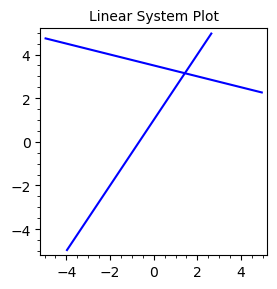

In [6]:
var('x y')

# Create the plots using implicit_plot
plot1 = implicit_plot(3*x - 2*y == -2, (x, -5, 5), (y, -5, 5))  # Equation 1
plot2 = implicit_plot(x + 4*y == 14, (x, -5, 5), (y, -5, 5))    # Equation 2

# Combine plots and show with intersection point
(plot1 + plot2).show(title='Linear System Plot', figsize=4)

Here we can visually see that the lines meet at exactly one point - a unique solution

### Infinite Solutions

### No Solution